<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/Keras/HandwrittenDigitClassificationMNISTUsingDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## We did the same problem with machine learning using decision tree classifier and got accuracy of
# 85%

In [ ]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train[0].shape # first image

(28, 28)

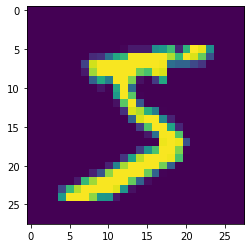

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

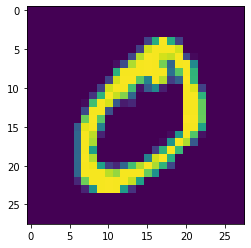

In [ ]:
plt.imshow(X_train[1])

## Now we need to scale all values

It seems scaled data helps in fast conversion of neural networks.

In [ ]:
X_train = X_train/255
X_test = X_test/255

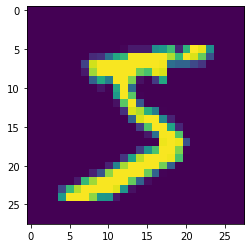

In [13]:
plt.imshow(X_train[0])

In [ ]:
 # We need to flatten our array to 784 from 28*28
 # keras provdie Flatten() to do the job.

In [38]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation="relu"))
# model.add(Dense(32, activation="relu"))

model.add(Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

we are using <b> Sparse categorical cross entropy</b> as loss function.
There is another loss function called categorical cross entropy.
We are using first one because we don't need to one hot encode our labels which are in the form 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.

In <b>categorical cross entropy</b>, we need to one hot encode the labels as well.

In [40]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2866 - accuracy: 0.9184 - val_loss: 0.1488 - val_accuracy: 0.9577
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1264 - accuracy: 0.9630 - val_loss: 0.1098 - val_accuracy: 0.9677
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0984 - val_accuracy: 0.9701
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0898 - val_accuracy: 0.9729
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9839 - val_loss: 0.0833 - val_accuracy: 0.9743
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0890 - val_accuracy:

In [41]:
y_prob = model.predict(X_test)

In [42]:
y_prob

array([[2.6420806e-12, 1.8774460e-13, 9.5027053e-09, ..., 9.9999988e-01,
        1.8742100e-11, 7.0951041e-09],
       [1.0777427e-12, 8.5110369e-10, 1.0000000e+00, ..., 1.5049854e-22,
        1.1102247e-12, 7.1826581e-20],
       [7.9933976e-08, 9.9997807e-01, 1.0451458e-05, ..., 1.1789195e-06,
        9.0742988e-06, 3.3845189e-09],
       ...,
       [1.3995973e-16, 1.2998092e-16, 1.4377523e-18, ..., 6.4872115e-11,
        4.8831937e-12, 3.4724673e-07],
       [4.0047327e-17, 1.4978349e-18, 1.2706003e-17, ..., 4.4275689e-14,
        1.3495812e-09, 3.6914687e-19],
       [2.1787192e-13, 1.5615409e-26, 2.0043026e-17, ..., 6.2167509e-23,
        1.1637249e-16, 7.8073224e-21]], dtype=float32)

### We have probabiltites for every number, we need to select number at index with highest probablity.

In [43]:
y_pred = y_prob.argmax(axis=1)

In [44]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9793

# DAMNNNNNNN
### 97% accuracy with no hyperparameter tuning

# optimizations

1. increase hidden layers, epochs , nodes in hidden layers

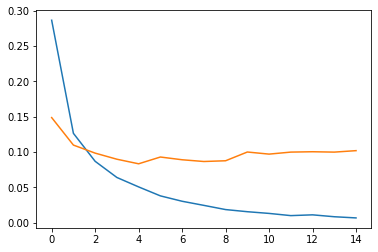

In [46]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

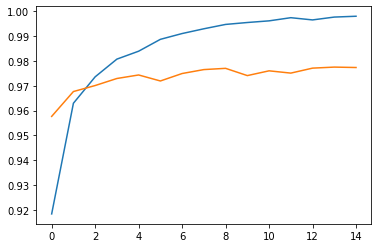

In [47]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

### To avoid overfitting we use things like regularization, etc.

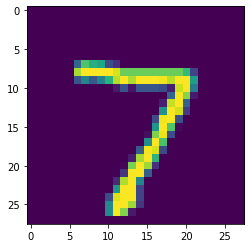

In [50]:
plt.imshow(X_test[0])

In [52]:
model.predict(X_test[0].reshape(1, 28, 28)).argmax(axis=1)

array([7])

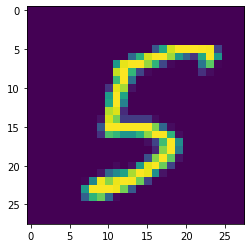

In [53]:
plt.imshow(X_test[23])

In [54]:
model.predict(X_test[23].reshape(1, 28, 28)).argmax(axis=1)

array([5])